# Data Science Mini Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using the read_csv function in pandas, we will ingest these three files.

In [2]:
movies = pd.read_csv('C:/Users/BRVR/Documents/Data Science MicroMasters/Course 1 - Python for Data Science/Week 4 - Pandas/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('C:/Users/BRVR/Documents/Data Science MicroMasters/Course 1 - Python for Data Science/Week 4 - Pandas/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
# delete unnecessary columns
del ratings['userId']
del ratings['timestamp']

In [5]:
ratings.head()

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5


In [6]:
ratings.index

RangeIndex(start=0, stop=20000263, step=1)

Data Cleaning: Check for missing data:

In [7]:
#is any row NULL ?
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [8]:
ratings.isnull().any()

movieId    False
rating     False
dtype: bool

**Let's only include movies with 5 or more unique ratings**

In [9]:
value_counts_by_id = ratings['movieId'].value_counts()
value_counts_by_id = value_counts_by_id.to_frame(name='count')

In [10]:
value_counts_by_id['movieId'] = value_counts_by_id.index

In [11]:
# select only movies that have greater than 5 reviews value_counts_by_id
relevant_counts = value_counts_by_id[value_counts_by_id['count'] >= 5]

In [12]:
len(relevant_counts)

18345

In [13]:
# now we join the relevant counts to the appropriate DataFrames
# we want to include a rated movie for every count that exists in relevant counts
movie_freq = pd.merge(ratings, relevant_counts, on="movieId", how='inner')

In [14]:
movie_freq.tail()

,movieId,rating,count
19984019,71755,5.0,5
19984020,71755,4.5,5
19984021,71755,2.5,5
19984022,71755,2.5,5
19984023,71755,4.5,5


In [15]:
average_rating = movie_freq.groupby('movieId').mean()

In [16]:
average_rating.head()

,rating,count
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161


**Merge the average_rating and movies dataframes:**

In [17]:
df = average_rating.merge(movies, on='movieId', how='inner')
df.head()

,movieId,rating,count,title,genres
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy


In [18]:
df.shape

(18345, 5)


**Extract the year from title into separate column**

In [19]:
df['year'] = df['title'].str.extract('.*\((.*)\).*', expand=True)

In [20]:
df.isnull().sum()

movieId    0
rating     0
count      0
title      0
genres     0
year       2
dtype: int64

**Remove two movies with missing year**

In [21]:
df['year'].sort_values(ascending=False)

18344    2015
18321    2015
18319    2015
18318    2015
18317    2015
18316    2015
18311    2015
18306    2015
18305    2015
18304    2015
18254    2015
18298    2015
18295    2015
18291    2015
18290    2015
18289    2015
18235    2015
17963    2015
18343    2015
18261    2015
18250    2015
18320    2015
18253    2015
18335    2015
18341    2015
18339    2015
18338    2015
18331    2015
18330    2015
18340    2015
         ... 
7812     1917
16061    1917
16053    1917
9814     1917
13545    1916
7093     1916
17075    1916
16052    1916
12343    1916
12996    1915
16054    1915
6917     1915
16055    1915
8279     1915
13700    1914
13946    1914
2145     1914
12646    1914
13304    1912
16118    1910
10986    1903
9728     1902
18194    1900
14747    1898
16685    1896
16360    1896
15490    1894
16225    1894
10235     NaN
18101     NaN
Name: year, Length: 18345, dtype: object

In [22]:
df.dropna(subset=['year'], inplace=True)

In [23]:
df.shape

(18343, 6)

In [24]:
df = df[df.year != '2007-']
df = df[df.year != '1975-1979']
df = df[df.year != '2009– ']


In [25]:
df.shape

(18341, 6)

In [26]:
df.isnull().sum()

movieId    0
rating     0
count      0
title      0
genres     0
year       0
dtype: int64

Good, we have clean data. 
From previous analysis, we already know all ratings values are within the proper range of 0 to 5.

Next, Group each rating based on movieId and find the mean rating of each movieId

In [27]:
df.head()

,movieId,rating,count,title,genres,year
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy,1995



**Filtering only movies released from 1990 - 1999 and from 2000 - 2014**      
*Note, 2015 has incomplete data only up to mar 31, 2015*

In [28]:

atleast90s = df['year'] > '1989'

before2000 = df['year'] < '2000'

after90s = df['year'] > '1999'
not_2015 = df['year'] < '2015'


movies_90s = df[atleast90s & before2000]
movies_2000s = df[after90s & not_2015]

df.shape, movies_90s.shape, movies_2000s.shape

((18341, 6), (3538, 6), (8380, 6))

In [38]:
movies_90s.head(10)

,movieId,rating,count,title,genres,year
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy,1995
5,6,3.834930,23899,Heat (1995),Action|Crime|Thriller,1995
6,7,3.366484,12961,Sabrina (1995),Comedy|Romance,1995
7,8,3.142049,1415,Tom and Huck (1995),Adventure|Children,1995
8,9,3.004924,3960,Sudden Death (1995),Action,1995
9,10,3.430029,29005,GoldenEye (1995),Action|Adventure|Thriller,1995


In [31]:
movies_2000s.head(10)

,movieId,rating,count,title,genres,year
2683,2769,3.129956,681,"Yards, The (2000)",Crime|Drama,2000
3090,3177,2.810680,1236,Next Friday (2000),Comedy,2000
3103,3190,2.280392,1020,Supernova (2000),Adventure|Sci-Fi|Thriller,2000
3138,3225,2.644370,897,Down to You (2000),Comedy|Romance,2000
3140,3228,2.104167,24,Wirey Spindell (2000),Comedy,2000
3150,3239,2.270732,205,Isn't She Great? (2000),Comedy,2000
3184,3273,2.461577,6051,Scream 3 (2000),Comedy|Horror|Mystery|Thriller,2000
3186,3275,3.947365,8027,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,2000
3187,3276,2.925926,297,Gun Shy (2000),Comedy,2000
3189,3279,2.050000,20,Knockout (2000),Action|Drama,2000


**Check if all values are in range 1990 - 1999**

In [32]:
filter_1 = movies_90s['year'] > '1999'
filter_1.any()

False

In [33]:
filter_2 = movies_90s['year'] < '1990'
filter_1.any()

False

In [34]:
movies_90s.isnull().sum()

movieId    0
rating     0
count      0
title      0
genres     0
year       0
dtype: int64

**Check if all values are in range 2000 - 2014**

In [35]:
filter_3 = movies_2000s['year'] > '2014'
filter_3.any()

False

In [36]:
filter_4 = movies_2000s['year'] < '2000'
filter_4.any()

False

In [37]:
movies_2000s.isnull().sum()

movieId    0
rating     0
count      0
title      0
genres     0
year       0
dtype: int64

**Our data seems to only include the correct year range**

**Let's filter by genre**

In [41]:
## List of genres as a Python list 

genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [42]:
genres

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [43]:
dfa = df
dfa = dfa[(dfa['year'] > '1959') & (dfa['year'] < '2015')]
dfa['year'].sort_values()

2661     1960
3948     1960
3939     1960
7795     1960
3856     1960
7884     1960
16404    1960
15291    1960
8008     1960
11879    1960
3708     1960
6385     1960
3502     1960
17710    1960
3377     1960
3374     1960
3118     1960
12053    1960
15521    1960
4086     1960
7648     1960
7645     1960
15694    1960
6324     1960
4689     1960
4685     1960
6320     1960
6318     1960
6312     1960
7451     1960
         ... 
17947    2014
17948    2014
17989    2014
17988    2014
17986    2014
17985    2014
17982    2014
17980    2014
17979    2014
17976    2014
17974    2014
17973    2014
17972    2014
17970    2014
17900    2014
17968    2014
17964    2014
17962    2014
17960    2014
17959    2014
17958    2014
17957    2014
17956    2014
17955    2014
17953    2014
17952    2014
17950    2014
17949    2014
17966    2014
17654    2014
Name: year, Length: 16205, dtype: object

In [44]:
#genres for all years
#Adding all genres as columns with boolean type, True if movie belongs to that genre or False otherwise
cols = dfa.columns.values
cols = np.append(cols, list(genres))
genres_list = pd.DataFrame(dfa, columns=cols)
genres_list = genres_list.fillna(False)
for genre in genres:
    genres_list[genre] = genres_list['genres'].str.contains(genre)

In [45]:
genres_list.shape

(16205, 24)

(2.5, 3.7)

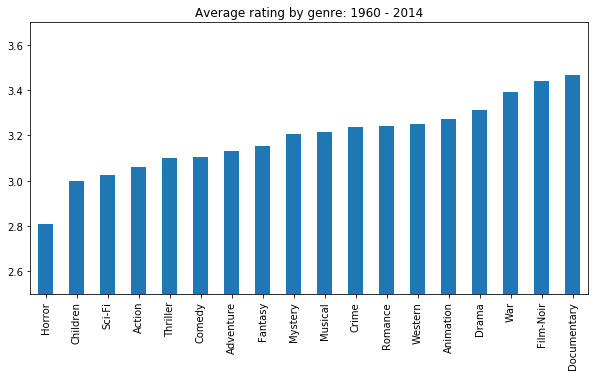

In [46]:
# Genre ratings for all years 1960 - 2014
avg_ratings = {genre : genres_list[genres_list[genre]]['rating'].mean() for genre in genres}
avg_ratings = pd.Series(avg_ratings)
ax = avg_ratings.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre: 1960 - 2014")
ax.set_ylim(2.5,3.7)

In [47]:
by_year = dfa[(dfa['year'] > '1959') & (dfa['year'] < '2015')]
by_year = by_year[['rating', 'year']].groupby('year', as_index=True).mean()

In [48]:
by_year.index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'],
      dtype='object', name='year')

<Figure size 432x288 with 0 Axes>

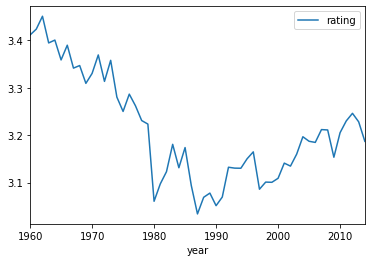

In [49]:
plt.figure()
by_year.plot(y='rating')

In [50]:
by_year90plus = dfa[(dfa['year'] > '1989') & (dfa['year'] < '2015')]
by_year90plus = by_year90plus[['rating', 'year']].groupby('year', as_index=True).mean()

In [51]:
by_year90plus.index

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object', name='year')

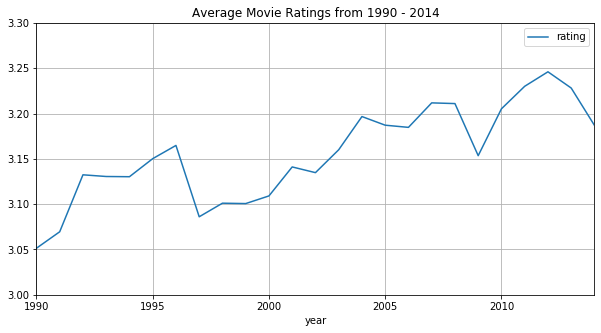

In [52]:
ax = by_year90plus.plot(figsize=(10,5), title = "Average Movie Ratings from 1990 - 2014", grid=True)
ax.set_ylim(3.0,3.3)

plt.savefig(r'Average Rating by Year.png')
plt.show()

In [53]:
genres_list['year'].sort_values()

2661     1960
3948     1960
3939     1960
7795     1960
3856     1960
7884     1960
16404    1960
15291    1960
8008     1960
11879    1960
3708     1960
6385     1960
3502     1960
17710    1960
3377     1960
3374     1960
3118     1960
12053    1960
15521    1960
4086     1960
7648     1960
7645     1960
15694    1960
6324     1960
4689     1960
4685     1960
6320     1960
6318     1960
6312     1960
7451     1960
         ... 
17947    2014
17948    2014
17989    2014
17988    2014
17986    2014
17985    2014
17982    2014
17980    2014
17979    2014
17976    2014
17974    2014
17973    2014
17972    2014
17970    2014
17900    2014
17968    2014
17964    2014
17962    2014
17960    2014
17959    2014
17958    2014
17957    2014
17956    2014
17955    2014
17953    2014
17952    2014
17950    2014
17949    2014
17966    2014
17654    2014
Name: year, Length: 16205, dtype: object

In [54]:
#genres for 1960s
#Adding all genres as columns with boolean type, True if movie belongs to that genre or False otherwise
cols = movies_60s.columns.values
cols = np.append(cols, list(genres))
genres_list60s = pd.DataFrame(movies_60s, columns=cols)
genres_list60 = genres_list60s.fillna(False)
for genre in genres:
    genres_list60s[genre] = genres_list60s['genres'].str.contains(genre)

(2.8, 3.8)

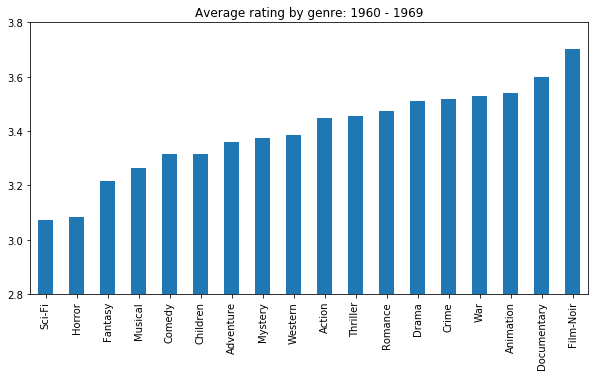

In [55]:
# Genre ratings for years 1960 - 1969
avg_ratings60s = {genre : genres_list60s[genres_list60s[genre]]['rating'].mean() for genre in genres}
avg_ratings60s = pd.Series(avg_ratings60s)
ax = avg_ratings60s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre: 1960 - 1969")
ax.set_ylim(2.8,3.8)

In [56]:
#Adding 70s genres as columns with boolean type, True if movie belongs to that genre or False otherwise
cols = movies_70s.columns.values
cols = np.append(cols, list(genres))
genres_list70s = pd.DataFrame(movies_70s, columns=cols)
genres_list70s = genres_list70s.fillna(False)
for genre in genres:
    genres_list70s[genre] = genres_list70s['genres'].str.contains(genre)

(2.8, 3.8)

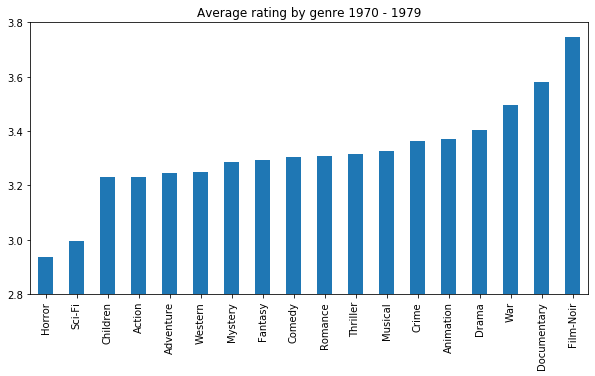

In [57]:
avg_ratings70s = {genre : genres_list70s[genres_list70s[genre]]['rating'].mean() for genre in genres}
avg_ratings70s = pd.Series(avg_ratings70s)
ax = avg_ratings70s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre 1970 - 1979")
ax.set_ylim(2.8,3.8)

In [58]:
#Adding 80s genres as columns with boolean type, True if movie belongs to that genre or False otherwise
cols = movies_80s.columns.values
cols = np.append(cols, list(genres))
genres_list80s = pd.DataFrame(movies_80s, columns=cols)
genres_list80s = genres_list80s.fillna(False)
for genre in genres:
    genres_list80s[genre] = genres_list80s['genres'].str.contains(genre)

(2.5, 3.8)

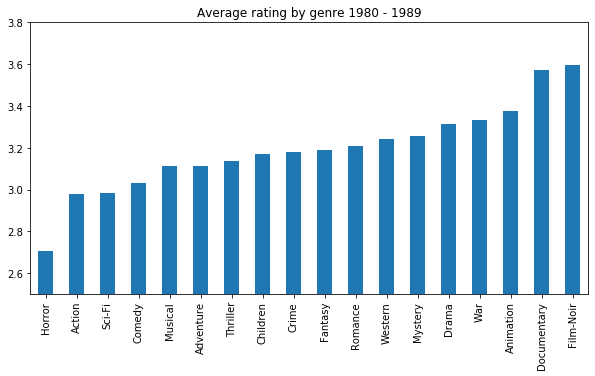

In [59]:
avg_ratings80s = {genre : genres_list80s[genres_list80s[genre]]['rating'].mean() for genre in genres}
avg_ratings80s = pd.Series(avg_ratings80s)
ax = avg_ratings80s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre 1980 - 1989")
ax.set_ylim(2.5,3.8)

# Now plot avg rating by genre for each decade

In [226]:
decades_genre = pd.DataFrame
decades_genre = pd.concat([avg_ratings60s, avg_ratings70s, avg_ratings80s, avg_ratings90s, avg_ratings2000s], axis=1, sort=False)
decades_genre.columns = ['1960s', '1970s', '1980s', '1990s', '2000s']
decades_genre

,1960s,1970s,1980s,1990s,2000s
Action,3.447565,3.232296,2.976349,2.953227,3.072349
Adventure,3.358442,3.245141,3.110485,3.033521,3.125399
Animation,3.541238,3.371581,3.374981,3.236963,3.246555
Children,3.314774,3.231742,3.170656,2.828015,2.972014
Comedy,3.313809,3.305902,3.030880,3.033601,3.108409
Crime,3.518991,3.363937,3.181160,3.195565,3.208344
Documentary,3.599005,3.579967,3.573923,3.401072,3.466128
Drama,3.510661,3.402712,3.314711,3.273500,3.290303
Fantasy,3.215549,3.292992,3.188913,3.050661,3.158915
Film-Noir,3.702696,3.747006,3.596654,3.314351,3.306858


In [227]:
dgt = decades_genre.T

In [229]:
dfd=pd.DataFrame({'x': dgt.index,
                 'adventure': dgt['Adventure'], 
                 'action': dgt['Action'], 
                 'children': dgt['Children'], 
                 'animation': dgt['Animation'],
                 'comedy': dgt['Comedy'],
                 'fantasy': dgt['Fantasy'],
                 'romance': dgt['Romance'],
                 'drama': dgt['Drama'],
                 'crime': dgt['Crime'],
                 'thriller': dgt['Thriller'],
                 'horror': dgt['Horror'],
                 'mystery': dgt['Mystery'],
                 'scifi': dgt['Sci-Fi'],
                 'documentary': dgt['Documentary'],
                 'war': dgt['War'],
                 'musical': dgt['Musical'],
                 'western': dgt['Western'],
                 'filmnoir': dgt['Film-Noir'],  })

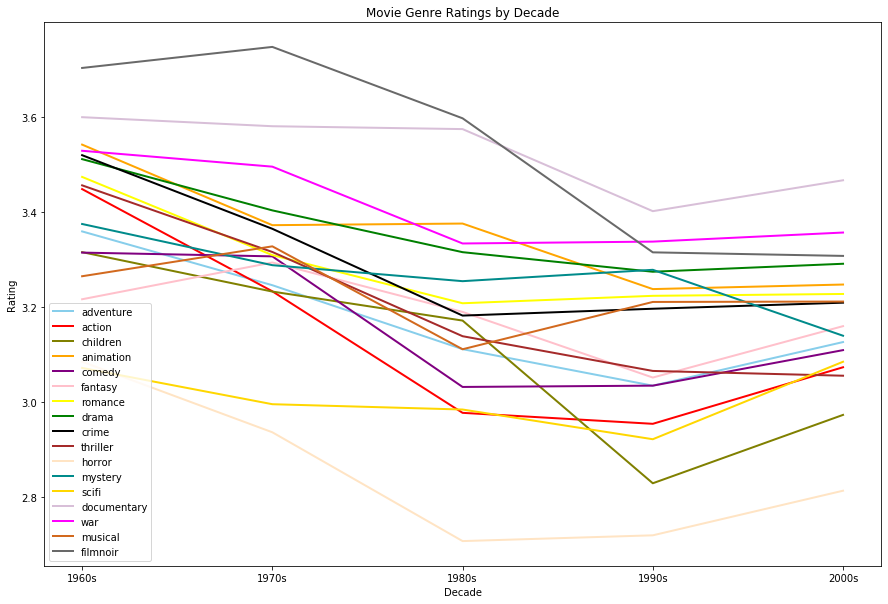

In [232]:
plt.figure(figsize=(15, 10))
#ax1 = plt.subplot((25,1,1), kind='bar')

plt.plot( 'x', 'adventure', data=dfd, marker='', color='skyblue', linewidth=2, label="adventure")
plt.plot( 'x', 'action', data=dfd, marker='', color='red', linewidth=2, label="action")
plt.plot( 'x', 'children', data=dfd, marker='', color='olive', linewidth=2, label="children")
plt.plot( 'x', 'animation', data=dfd, marker='', color='orange', linewidth=2, label="animation")
plt.plot( 'x', 'comedy', data=dfd, marker='', color='purple', linewidth=2, label="comedy")
plt.plot( 'x', 'fantasy', data=dfd, marker='', color='pink', linewidth=2, label="fantasy")
plt.plot( 'x', 'romance', data=dfd, marker='', color='yellow', linewidth=2, label="romance")
plt.plot( 'x', 'drama', data=dfd, marker='', color='green', linewidth=2, label="drama")
plt.plot( 'x', 'crime', data=dfd, marker='', color='black', linewidth=2, label="crime")
plt.plot( 'x', 'thriller', data=dfd, marker='', color='brown', linewidth=2, label="thriller")
plt.plot( 'x', 'horror', data=dfd, marker='', color='bisque', linewidth=2, label="horror")
plt.plot( 'x', 'mystery', data=dfd, marker='', color='darkcyan', linewidth=2, label="mystery")
plt.plot( 'x', 'scifi', data=dfd, marker='', color='gold', linewidth=2, label="scifi")
plt.plot( 'x', 'documentary', data=dfd, marker='', color='thistle', linewidth=2, label="documentary")
plt.plot( 'x', 'war', data=dfd, marker='', color='fuchsia', linewidth=2, label="war")
plt.plot( 'x', 'musical', data=dfd, marker='', color='chocolate', linewidth=2, label="musical")
plt.plot( 'x', 'filmnoir', data=dfd, marker='', color='dimgray', linewidth=2, label="filmnoir")


plt.title('Movie Genre Ratings by Decade')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [122]:
#Adding 90s genres as columns with boolean type, True if movie belongs to that genre or False otherwise
cols = movies_90s.columns.values
cols = np.append(cols, list(genres))
genres_list90s = pd.DataFrame(movies_90s, columns=cols)
genres_list90s = genres_list90s.fillna(False)
for genre in genres:
    genres_list90s[genre] = genres_list90s['genres'].str.contains(genre)

In [123]:
genres_list90s.shape

(3538, 24)

In [125]:
genres_list90s.head()

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy,1995,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy,1995,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Let's do the same for 2000s**

In [126]:
#Adding 2000s genres as columns with boolean type, True if movie belongs to that genre or False otherwise
cols = movies_2000s.columns.values
cols = np.append(cols, list(genres))
genres_list2000s = pd.DataFrame(movies_2000s, columns=cols)
genres_list2000s = genres_list2000s.fillna(False)
for genre in genres:
    genres_list2000s[genre] = genres_list2000s['genres'].str.contains(genre)

(2.5, 3.5)

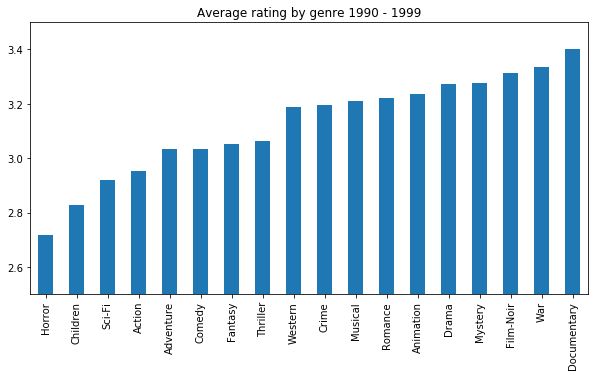

In [127]:
avg_ratings90s = {genre : genres_list90s[genres_list90s[genre]]['rating'].mean() for genre in genres}
avg_ratings90s = pd.Series(avg_ratings90s)
ax = avg_ratings90s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre 1990 - 1999")
ax.set_ylim(2.5,3.5)

In [128]:
avg_ratings90s.sort_values(ascending=False)

Documentary    3.401072
War            3.336950
Film-Noir      3.314351
Mystery        3.277577
Drama          3.273500
Animation      3.236963
Romance        3.222790
Musical        3.209885
Crime          3.195565
Western        3.186490
Thriller       3.064593
Fantasy        3.050661
Comedy         3.033601
Adventure      3.033521
Action         2.953227
Sci-Fi         2.920764
Children       2.828015
Horror         2.718391
dtype: float64

In [129]:
genres_list90s[genres].sum().sort_values(ascending=False)

Drama          1796
Comedy         1299
Romance         602
Thriller        592
Action          516
Crime           391
Adventure       308
Horror          245
Sci-Fi          227
Children        221
Fantasy         191
Documentary     185
Mystery         163
Animation       128
War              94
Musical          82
Western          39
Film-Noir        17
dtype: int64

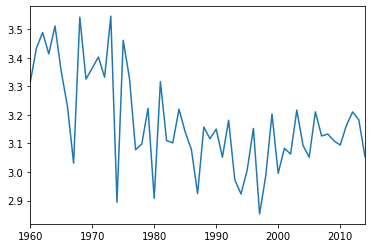

In [132]:
dfa2['adventure'].plot()

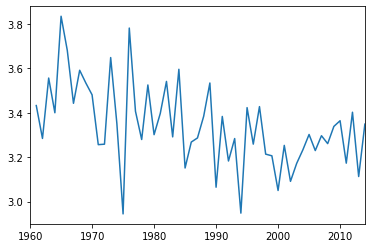

In [76]:
dfa2['animation'].plot()

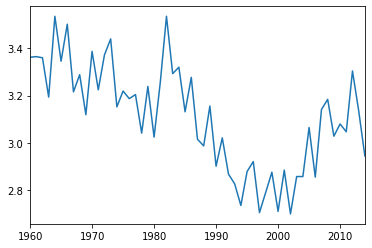

In [77]:
dfa2['children'].plot()

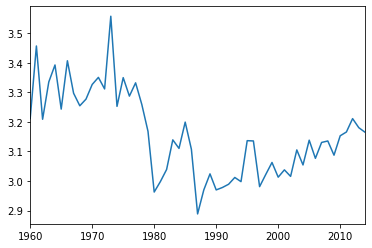

In [78]:
dfa2['comedy'].plot()

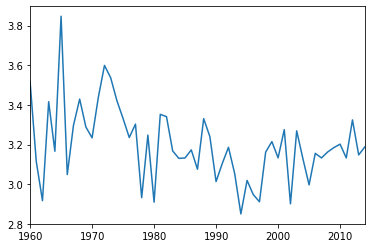

In [79]:
dfa2['fantasy'].plot()

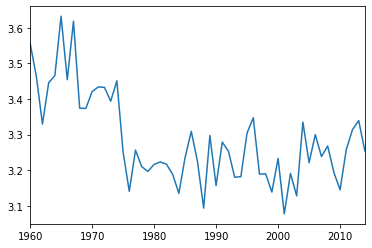

In [80]:
dfa2['romance'].plot()

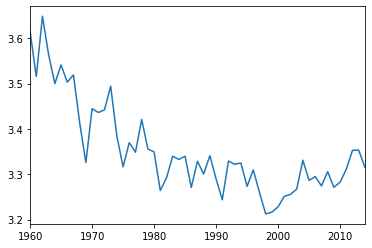

In [81]:
dfa2['drama'].plot()

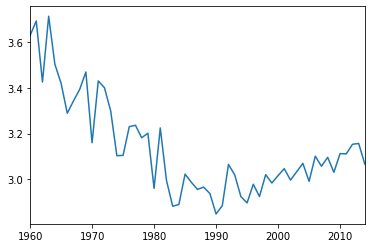

In [82]:
dfa2['action'].plot()

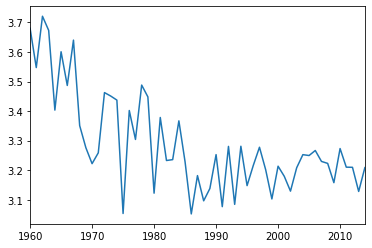

In [83]:
dfa2['crime'].plot()

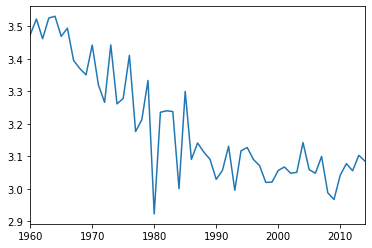

In [84]:
dfa2['thriller'].plot()

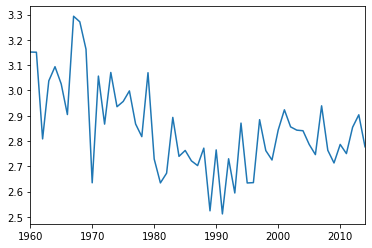

In [85]:
dfa2['horror'].plot()

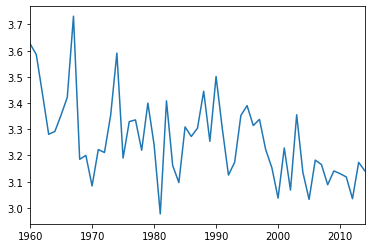

In [86]:
dfa2['mystery'].plot()

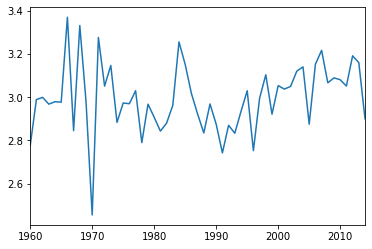

In [87]:
dfa2['scifi'].plot()

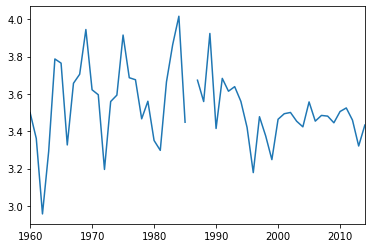

In [88]:
dfa2['documentary'].plot()

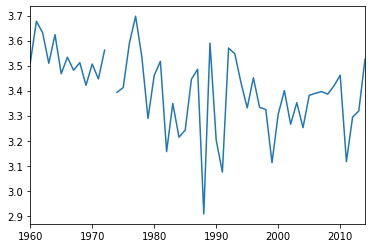

In [89]:
dfa2['war'].plot()

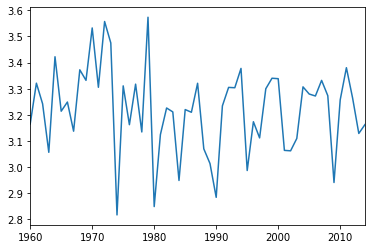

In [90]:
dfa2['musical'].plot()

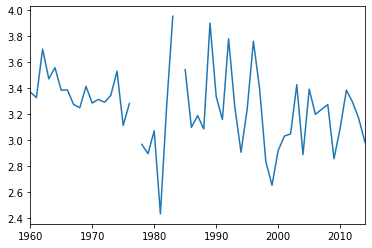

In [91]:
dfa2['western'].plot()

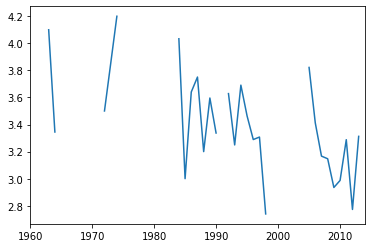

In [92]:
dfa2['filmnoir'].plot()

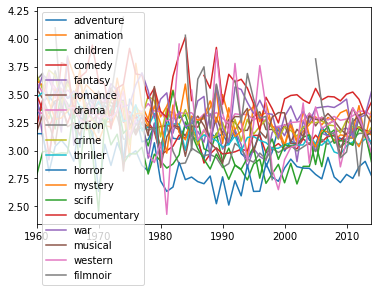

In [95]:
dfa2.plot()

In [134]:
genre_list = list(genres)

In [135]:
genre_list

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [136]:
genres_rating_list = list(avg_ratings90s)

In [137]:
dfg = {'Genre':genres, 'Genres Mean Rating':genres_rating_list}

In [138]:
genres_rating = pd.DataFrame(dfg)

In [139]:
genres_rating

,Genre,Genres Mean Rating
0,Action,2.953227
1,Adventure,3.033521
2,Animation,3.236963
3,Children,2.828015
4,Comedy,3.033601
5,Crime,3.195565
6,Documentary,3.401072
7,Drama,3.273500
8,Fantasy,3.050661
9,Film-Noir,3.314351


In [140]:
genres_rating['Mean'] = genres_rating['Genres Mean Rating'].mean()

In [141]:
genre_mean = round(genres_rating['Genres Mean Rating'], 2)

In [142]:
genres_rating['Genre Mean'] = genre_mean

In [143]:
genres_rating

,Genre,Genres Mean Rating,Mean,Genre Mean
0,Action,2.953227,3.12544,2.95
1,Adventure,3.033521,3.12544,3.03
2,Animation,3.236963,3.12544,3.24
3,Children,2.828015,3.12544,2.83
4,Comedy,3.033601,3.12544,3.03
5,Crime,3.195565,3.12544,3.20
6,Documentary,3.401072,3.12544,3.40
7,Drama,3.273500,3.12544,3.27
8,Fantasy,3.050661,3.12544,3.05
9,Film-Noir,3.314351,3.12544,3.31


In [144]:
genres

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [145]:
my_rating_list = [round(genres_rating_list, 2) for genres_rating_list in genres_rating_list]

In [146]:
my_rating_list

[2.95,
 3.03,
 3.24,
 2.83,
 3.03,
 3.2,
 3.4,
 3.27,
 3.05,
 3.31,
 2.72,
 3.21,
 3.28,
 3.22,
 2.92,
 3.06,
 3.34,
 3.19]

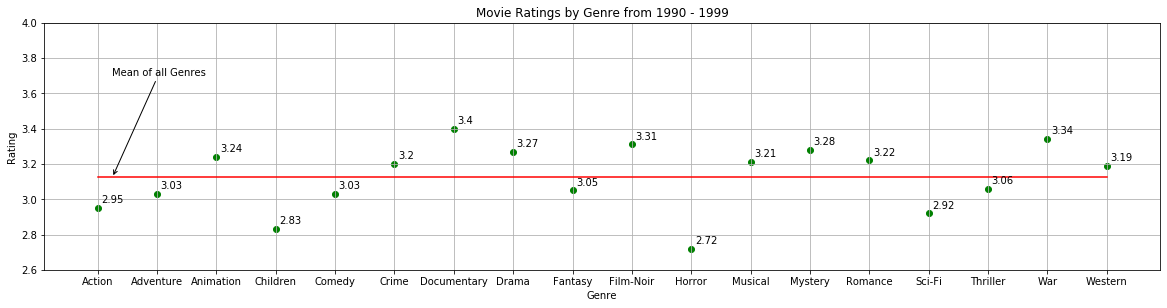

In [147]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,1,1)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = my_rating_list
plt.xticks(range(len(x)), xticks_genre_list)
plt.scatter(x,y, color='g')
plt.plot(x, genres_rating['Mean'], color="red")
plt.autoscale(tight=False)
#plt.rcParams["figure.figsize"] = (10,2)
plt.title('Movie Ratings by Genre from 1990 - 1999')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(ymax = 4, ymin = 2.6)
plt.grid(True)


plt.annotate("Mean of all Genres",
            xy=(0.25,3.12544), xycoords='data',
            xytext=(0.25, 3.7), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.06, y[i] + 0.03))

plt.savefig(r'90smovie-ratings-by-genre2.png')
plt.show()

**Now let's see how the results change if we remove all movies rated 2.5 and below:**

In [148]:
highly_rated = genres_list90s['rating'] > 2.5


high90s = genres_list90s[highly_rated]
high90s

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy,1995,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy,1995,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,3.834930,23899,Heat (1995),Action|Crime|Thriller,1995,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,7,3.366484,12961,Sabrina (1995),Comedy|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,8,3.142049,1415,Tom and Huck (1995),Adventure|Children,1995,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
8,9,3.004924,3960,Sudden Death (1995),Action,1995,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,3.430029,29005,GoldenEye (1995),Action|Adventure|Thriller,1995,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False


(3.0, 3.6)

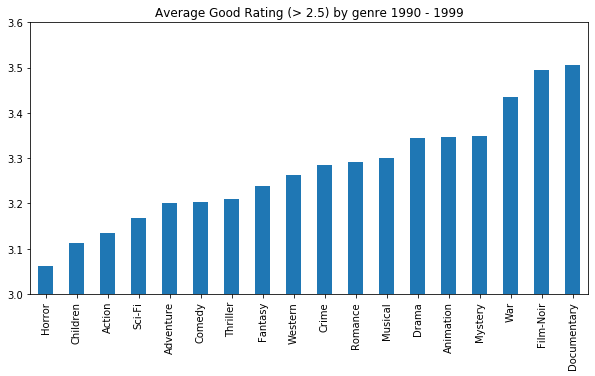

In [149]:
avg_high90s = {genre : high90s[high90s[genre]]['rating'].mean() for genre in genres}
avg_high90s = pd.Series(avg_high90s)
ax = avg_high90s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average Good Rating (> 2.5) by genre 1990 - 1999")
ax.set_ylim(3.0,3.6)

In [150]:
avg_high90s.sort_values(ascending=False)

Documentary    3.506184
Film-Noir      3.494227
War            3.435419
Mystery        3.348599
Animation      3.345774
Drama          3.343659
Musical        3.301245
Romance        3.291515
Crime          3.284914
Western        3.262589
Fantasy        3.237577
Thriller       3.209105
Comedy         3.204293
Adventure      3.201902
Sci-Fi         3.166805
Action         3.135262
Children       3.111927
Horror         3.062158
dtype: float64

In [151]:
high90s[genres].sum().sort_values(ascending=False)

Drama          1682
Comedy         1079
Romance         562
Thriller        508
Action          422
Crime           359
Adventure       257
Sci-Fi          174
Documentary     173
Horror          162
Fantasy         157
Children        154
Mystery         152
Animation       115
War              86
Musical          75
Western          36
Film-Noir        15
dtype: int64

In [152]:
avg_ratings90s.sort_values(ascending=False)

Documentary    3.401072
War            3.336950
Film-Noir      3.314351
Mystery        3.277577
Drama          3.273500
Animation      3.236963
Romance        3.222790
Musical        3.209885
Crime          3.195565
Western        3.186490
Thriller       3.064593
Fantasy        3.050661
Comedy         3.033601
Adventure      3.033521
Action         2.953227
Sci-Fi         2.920764
Children       2.828015
Horror         2.718391
dtype: float64

In [153]:
genres_list90s[genres].sum().sort_values(ascending=False)

Drama          1796
Comedy         1299
Romance         602
Thriller        592
Action          516
Crime           391
Adventure       308
Horror          245
Sci-Fi          227
Children        221
Fantasy         191
Documentary     185
Mystery         163
Animation       128
War              94
Musical          82
Western          39
Film-Noir        17
dtype: int64

**Try with dropping <= 3.0**

In [154]:
highest_rated = genres_list90s['rating'] > 3.0


highest90s = genres_list90s[highest_rated]
highest90s

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy,1995,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy,1995,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,3.834930,23899,Heat (1995),Action|Crime|Thriller,1995,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,7,3.366484,12961,Sabrina (1995),Comedy|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,8,3.142049,1415,Tom and Huck (1995),Adventure|Children,1995,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
8,9,3.004924,3960,Sudden Death (1995),Action,1995,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,3.430029,29005,GoldenEye (1995),Action|Adventure|Thriller,1995,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
10,11,3.667713,18162,"American President, The (1995)",Comedy|Drama|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


(3.3, 3.7)

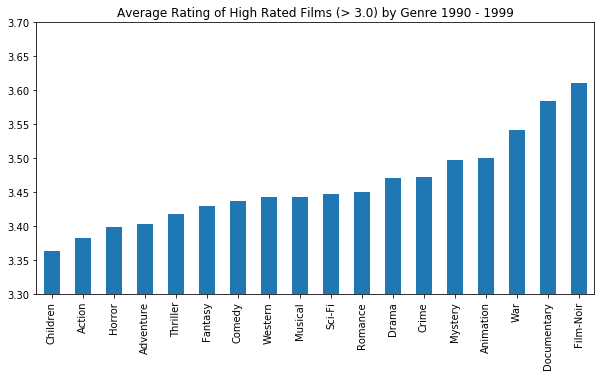

In [155]:
avg_highest90s = {genre : highest90s[highest90s[genre]]['rating'].mean() for genre in genres}
avg_highest90s = pd.Series(avg_highest90s)
ax = avg_highest90s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average Rating of High Rated Films (> 3.0) by Genre 1990 - 1999")
ax.set_ylim(3.3,3.7)

In [156]:
avg_highest90s.sort_values(ascending=False)

Film-Noir      3.610844
Documentary    3.583650
War            3.541929
Animation      3.499576
Mystery        3.497531
Crime          3.472777
Drama          3.471517
Romance        3.449746
Sci-Fi         3.447432
Musical        3.443505
Western        3.443069
Comedy         3.436717
Fantasy        3.430076
Thriller       3.417238
Adventure      3.403671
Horror         3.399161
Action         3.382302
Children       3.363895
dtype: float64

In [157]:
highest90s[genres].sum().sort_values(ascending=False)

Drama          1359
Comedy          698
Romance         425
Thriller        337
Crime           258
Action          250
Adventure       173
Documentary     156
Mystery         120
Fantasy         110
Sci-Fi          102
Animation        90
Children         87
Horror           77
War              74
Musical          58
Western          26
Film-Noir        13
dtype: int64

In [158]:
high90s[genres].sum().sort_values(ascending=False)

Drama          1682
Comedy         1079
Romance         562
Thriller        508
Action          422
Crime           359
Adventure       257
Sci-Fi          174
Documentary     173
Horror          162
Fantasy         157
Children        154
Mystery         152
Animation       115
War              86
Musical          75
Western          36
Film-Noir        15
dtype: int64

In [159]:
avg_high90s.sort_values(ascending=False)

Documentary    3.506184
Film-Noir      3.494227
War            3.435419
Mystery        3.348599
Animation      3.345774
Drama          3.343659
Musical        3.301245
Romance        3.291515
Crime          3.284914
Western        3.262589
Fantasy        3.237577
Thriller       3.209105
Comedy         3.204293
Adventure      3.201902
Sci-Fi         3.166805
Action         3.135262
Children       3.111927
Horror         3.062158
dtype: float64

In [160]:
avg_ratings90s.sort_values(ascending=False)

Documentary    3.401072
War            3.336950
Film-Noir      3.314351
Mystery        3.277577
Drama          3.273500
Animation      3.236963
Romance        3.222790
Musical        3.209885
Crime          3.195565
Western        3.186490
Thriller       3.064593
Fantasy        3.050661
Comedy         3.033601
Adventure      3.033521
Action         2.953227
Sci-Fi         2.920764
Children       2.828015
Horror         2.718391
dtype: float64

**Which Genre had the most highest rated (>= 4.0) films, and average highest rating for Highest Rated Films?**

In [161]:
top_rated = genres_list90s['rating'] >= 4.0


top90s = genres_list90s[top_rated]
top90s

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
27,28,4.057546,3154,Persuasion (1995),Drama|Romance,1995,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
46,47,4.053493,43249,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
49,50,4.334372,47006,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
81,82,4.004925,2538,Antonia's Line (Antonia) (1995),Comedy|Drama,1995,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108,110,4.042534,53769,Braveheart (1995),Action|Drama|War,1995,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
160,162,4.009925,5995,Crumb (1994),Documentary,1994,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211,213,4.038462,1872,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama,1994,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
212,214,4.047240,942,Before the Rain (Pred dozhdot) (1994),Drama|War,1994,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
229,232,4.035610,6150,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,1994,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
243,246,4.042897,10432,Hoop Dreams (1994),Documentary,1994,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(4.0, 4.2)

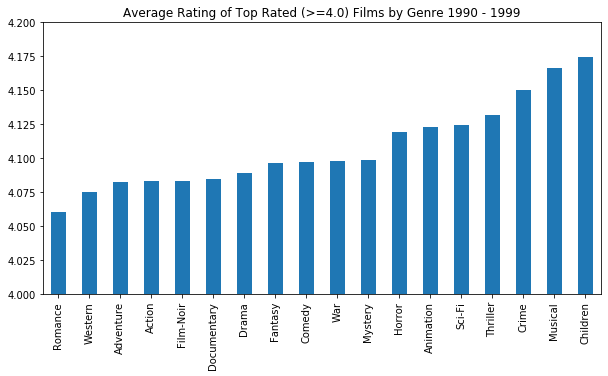

In [162]:
avg_top90s = {genre : top90s[top90s[genre]]['rating'].mean() for genre in genres}
avg_top90s = pd.Series(avg_top90s)
ax = avg_top90s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average Rating of Top Rated (>=4.0) Films by Genre 1990 - 1999")
ax.set_ylim(4.0,4.2)

In [163]:
avg_top90s.sort_values(ascending=False)

Children       4.174192
Musical        4.166667
Crime          4.150173
Thriller       4.131435
Sci-Fi         4.124139
Animation      4.123231
Horror         4.119018
Mystery        4.098482
War            4.097810
Comedy         4.097163
Fantasy        4.096299
Drama          4.089270
Documentary    4.084568
Film-Noir      4.083377
Action         4.083272
Adventure      4.082715
Western        4.074903
Romance        4.060541
dtype: float64

In [164]:
top90s[genres].sum().sort_values(ascending=False)

Drama          49
Comedy         24
Crime          16
Documentary    14
Thriller       13
Romance        11
Action          9
Mystery         9
War             8
Animation       6
Sci-Fi          3
Horror          3
Adventure       3
Musical         2
Children        2
Western         1
Film-Noir       1
Fantasy         1
dtype: int64

**Let's take a look at the same analysis for films released in the 2000s (2000 - 2014)**

(2.7, 3.5)

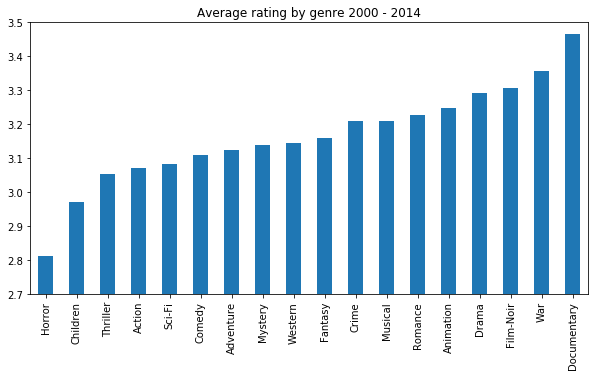

In [165]:
avg_ratings2000s = {genre : genres_list2000s[genres_list2000s[genre]]['rating'].mean() for genre in genres}
avg_ratings2000s = pd.Series(avg_ratings2000s)
ax = avg_ratings2000s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre 2000 - 2014")
ax.set_ylim(2.7,3.5)

In [166]:
avg_ratings2000s.sort_values(ascending=False)

Documentary    3.466128
War            3.356064
Film-Noir      3.306858
Drama          3.290303
Animation      3.246555
Romance        3.226703
Musical        3.210710
Crime          3.208344
Fantasy        3.158915
Western        3.145165
Mystery        3.138727
Adventure      3.125399
Comedy         3.108409
Sci-Fi         3.083934
Action         3.072349
Thriller       3.054528
Children       2.972014
Horror         2.812326
dtype: float64

In [167]:
genres_list2000s[genres].sum().sort_values(ascending=False)

Drama          4241
Comedy         2738
Thriller       1690
Romance        1316
Action         1295
Crime          1002
Documentary     927
Horror          857
Adventure       724
Sci-Fi          598
Fantasy         535
Mystery         521
Animation       451
Children        350
War             292
Musical         253
Western          67
Film-Noir        19
dtype: int64

(1, 5000)

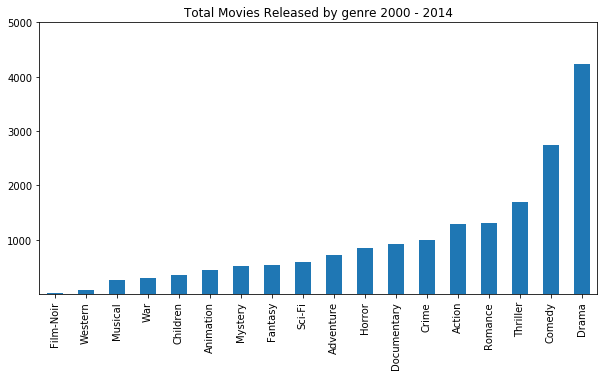

In [233]:
ax = genres_list2000s[genres].sum().sort_values().plot(kind='bar', figsize=(10,5), title = "Total Movies Released by genre 2000 - 2014")
ax.set_ylim(1,5000)

(1, 2000)

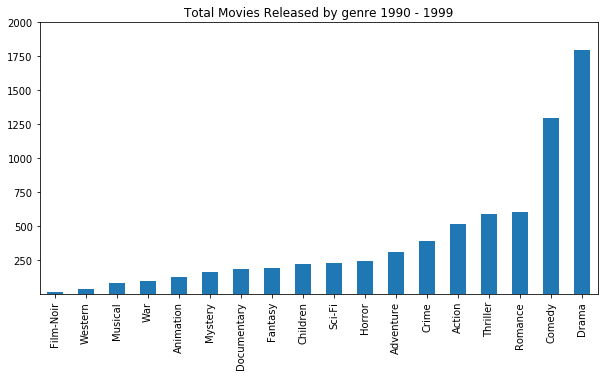

In [234]:
ax = genres_list90s[genres].sum().sort_values().plot(kind='bar', figsize=(10,5), title = "Total Movies Released by genre 1990 - 1999")
ax.set_ylim(1,2000)

In [170]:
genres_list90s[genres].sum().sort_values(ascending=False)

Drama          1796
Comedy         1299
Romance         602
Thriller        592
Action          516
Crime           391
Adventure       308
Horror          245
Sci-Fi          227
Children        221
Fantasy         191
Documentary     185
Mystery         163
Animation       128
War              94
Musical          82
Western          39
Film-Noir        17
dtype: int64

In [174]:
genre_list = list(genres)

In [175]:
genres_rating_list2 = list(avg_ratings2000s)

In [176]:
dfg2 = {'Genre':genres, 'Genres Mean Rating':genres_rating_list2}

In [177]:
genres_rating2 = pd.DataFrame(dfg2)

In [178]:
genres_rating2

,Genre,Genres Mean Rating
0,Action,3.072349
1,Adventure,3.125399
2,Animation,3.246555
3,Children,2.972014
4,Comedy,3.108409
5,Crime,3.208344
6,Documentary,3.466128
7,Drama,3.290303
8,Fantasy,3.158915
9,Film-Noir,3.306858


In [179]:
genres_rating2['Mean'] = genres_rating2['Genres Mean Rating'].mean()

In [180]:
genre_mean2 = round(genres_rating2['Genres Mean Rating'], 2)

In [181]:
genres_rating2['Genre Mean'] = genre_mean2

In [182]:
genres_rating2

,Genre,Genres Mean Rating,Mean,Genre Mean
0,Action,3.072349,3.165746,3.07
1,Adventure,3.125399,3.165746,3.13
2,Animation,3.246555,3.165746,3.25
3,Children,2.972014,3.165746,2.97
4,Comedy,3.108409,3.165746,3.11
5,Crime,3.208344,3.165746,3.21
6,Documentary,3.466128,3.165746,3.47
7,Drama,3.290303,3.165746,3.29
8,Fantasy,3.158915,3.165746,3.16
9,Film-Noir,3.306858,3.165746,3.31


In [183]:
my_rating_list2 = [round(genres_rating_list2, 2) for genres_rating_list2 in genres_rating_list2]

In [184]:
my_rating_list2

[3.07,
 3.13,
 3.25,
 2.97,
 3.11,
 3.21,
 3.47,
 3.29,
 3.16,
 3.31,
 2.81,
 3.21,
 3.14,
 3.23,
 3.08,
 3.05,
 3.36,
 3.15]

In [185]:
overall_mean = round(avg_ratings2000s.mean(), 6)

print(overall_mean)

3.165746


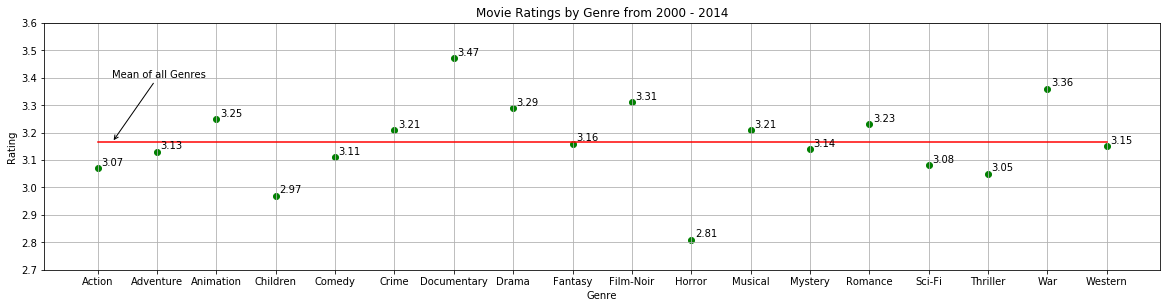

In [186]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,1,1)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = my_rating_list2
plt.xticks(range(len(x)), xticks_genre_list)
plt.scatter(x,y, color='g')
plt.plot(x, genres_rating2['Mean'], color="red")
plt.autoscale(tight=False)
#plt.rcParams["figure.figsize"] = (10,2)
plt.title('Movie Ratings by Genre from 2000 - 2014')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(ymax = 3.6, ymin = 2.7)
plt.grid(True)


plt.annotate("Mean of all Genres",
            xy=(0.25,3.166), xycoords='data',
            xytext=(0.25, 3.4), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.06, y[i] + 0.01))
    
plt.savefig(r'2000smovie-ratings-by-genre2.png')

plt.show()

**Now let's see how the results change if we remove all movies rated 2.5 and below:**

In [187]:
highly_rated2 = genres_list2000s['rating'] > 2.5


high2000s = genres_list2000s[highly_rated2]
high2000s

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2683,2769,3.129956,681,"Yards, The (2000)",Crime|Drama,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3090,3177,2.810680,1236,Next Friday (2000),Comedy,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3138,3225,2.644370,897,Down to You (2000),Comedy|Romance,2000,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3186,3275,3.947365,8027,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,2000,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3187,3276,2.925926,297,Gun Shy (2000),Comedy,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3195,3285,3.002591,5404,"Beach, The (2000)",Adventure|Drama,2000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3197,3287,2.883117,847,"Tigger Movie, The (2000)",Animation|Children,2000,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3207,3298,3.492586,4451,Boiler Room (2000),Crime|Drama|Thriller,2000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3209,3300,3.396981,7154,Pitch Black (2000),Horror|Sci-Fi|Thriller,2000,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
3210,3301,3.342265,6606,"Whole Nine Yards, The (2000)",Comedy|Crime,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(3.0, 3.6)

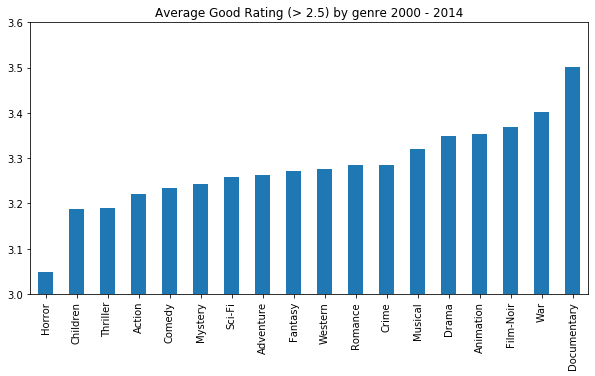

In [188]:
avg_high2000s = {genre : high2000s[high2000s[genre]]['rating'].mean() for genre in genres}
avg_high2000s = pd.Series(avg_high2000s)
ax = avg_high2000s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average Good Rating (> 2.5) by genre 2000 - 2014")
ax.set_ylim(3.0,3.6)

In [189]:
avg_high2000s.sort_values(ascending=False)

Documentary    3.501485
War            3.402021
Film-Noir      3.368350
Animation      3.352675
Drama          3.347927
Musical        3.321282
Crime          3.285026
Romance        3.284519
Western        3.275129
Fantasy        3.270979
Adventure      3.262988
Sci-Fi         3.257791
Mystery        3.243585
Comedy         3.234644
Action         3.220599
Thriller       3.188978
Children       3.188679
Horror         3.048131
dtype: float64

In [190]:
high2000s[genres].sum().sort_values(ascending=False)

Drama          4020
Comedy         2419
Thriller       1456
Romance        1252
Action         1124
Crime           933
Documentary     903
Adventure       636
Horror          634
Sci-Fi          507
Fantasy         480
Mystery         466
Animation       412
War             281
Children        281
Musical         231
Western          59
Film-Noir        18
dtype: int64

In [191]:
avg_ratings2000s.sort_values(ascending=False)

Documentary    3.466128
War            3.356064
Film-Noir      3.306858
Drama          3.290303
Animation      3.246555
Romance        3.226703
Musical        3.210710
Crime          3.208344
Fantasy        3.158915
Western        3.145165
Mystery        3.138727
Adventure      3.125399
Comedy         3.108409
Sci-Fi         3.083934
Action         3.072349
Thriller       3.054528
Children       2.972014
Horror         2.812326
dtype: float64

In [192]:
genres_list2000s[genres].sum().sort_values(ascending=False)

Drama          4241
Comedy         2738
Thriller       1690
Romance        1316
Action         1295
Crime          1002
Documentary     927
Horror          857
Adventure       724
Sci-Fi          598
Fantasy         535
Mystery         521
Animation       451
Children        350
War             292
Musical         253
Western          67
Film-Noir        19
dtype: int64

**Try with dropping <= 3.0**

In [193]:
highest_rated2 = genres_list2000s['rating'] > 3.0


highest2000s = genres_list2000s[highest_rated2]
highest2000s

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2683,2769,3.129956,681,"Yards, The (2000)",Crime|Drama,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3186,3275,3.947365,8027,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,2000,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3195,3285,3.002591,5404,"Beach, The (2000)",Adventure|Drama,2000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3207,3298,3.492586,4451,Boiler Room (2000),Crime|Drama|Thriller,2000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3209,3300,3.396981,7154,Pitch Black (2000),Horror|Sci-Fi|Thriller,2000,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
3210,3301,3.342265,6606,"Whole Nine Yards, The (2000)",Comedy|Crime,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3212,3303,3.544304,79,Black Tar Heroin: The Dark End of the Street (...,Documentary,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3226,3317,3.746887,6586,Wonder Boys (2000),Comedy|Drama,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3232,3323,3.067901,81,Chain of Fools (2000),Comedy|Crime,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3262,3353,3.114286,35,"Closer You Get, The (2000)",Comedy|Romance,2000,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


(3.2, 3.6)

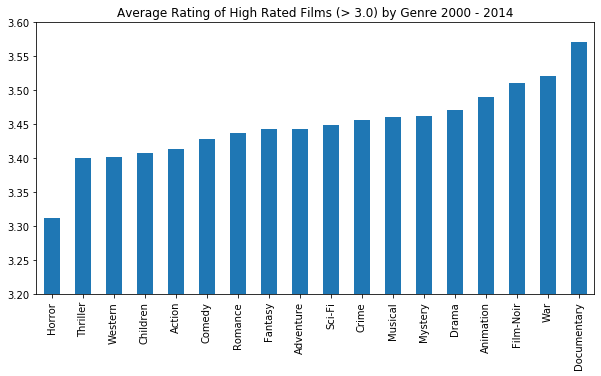

In [194]:
avg_highest2000s = {genre : highest2000s[highest2000s[genre]]['rating'].mean() for genre in genres}
avg_highest2000s = pd.Series(avg_highest2000s)
ax = avg_highest2000s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average Rating of High Rated Films (> 3.0) by Genre 2000 - 2014")
ax.set_ylim(3.2,3.6)

In [195]:
avg_highest2000s.sort_values(ascending=False)

Documentary    3.571069
War            3.520386
Film-Noir      3.510992
Animation      3.490625
Drama          3.470775
Mystery        3.462157
Musical        3.460665
Crime          3.455896
Sci-Fi         3.448534
Adventure      3.443347
Fantasy        3.443187
Romance        3.437627
Comedy         3.427827
Action         3.412829
Children       3.406900
Western        3.401198
Thriller       3.399684
Horror         3.312025
dtype: float64

In [196]:
highest2000s[genres].sum().sort_values(ascending=False)

Drama          3267
Comedy         1684
Thriller        953
Romance         950
Documentary     818
Action          774
Crime           686
Adventure       462
Sci-Fi          360
Fantasy         355
Animation       327
Horror          325
Mystery         316
War             233
Children        186
Musical         180
Western          45
Film-Noir        14
dtype: int64

In [197]:
high2000s[genres].sum().sort_values(ascending=False)

Drama          4020
Comedy         2419
Thriller       1456
Romance        1252
Action         1124
Crime           933
Documentary     903
Adventure       636
Horror          634
Sci-Fi          507
Fantasy         480
Mystery         466
Animation       412
War             281
Children        281
Musical         231
Western          59
Film-Noir        18
dtype: int64

In [198]:
avg_high2000s.sort_values(ascending=False)

Documentary    3.501485
War            3.402021
Film-Noir      3.368350
Animation      3.352675
Drama          3.347927
Musical        3.321282
Crime          3.285026
Romance        3.284519
Western        3.275129
Fantasy        3.270979
Adventure      3.262988
Sci-Fi         3.257791
Mystery        3.243585
Comedy         3.234644
Action         3.220599
Thriller       3.188978
Children       3.188679
Horror         3.048131
dtype: float64

In [199]:
avg_ratings2000s.sort_values(ascending=False)

Documentary    3.466128
War            3.356064
Film-Noir      3.306858
Drama          3.290303
Animation      3.246555
Romance        3.226703
Musical        3.210710
Crime          3.208344
Fantasy        3.158915
Western        3.145165
Mystery        3.138727
Adventure      3.125399
Comedy         3.108409
Sci-Fi         3.083934
Action         3.072349
Thriller       3.054528
Children       2.972014
Horror         2.812326
dtype: float64

**Which Genre had the most highest rated (>= 4.0) films, and average highest rating for Highest Rated Films?**

In [200]:
top_rated2 = genres_list2000s['rating'] >= 4.0


top2000s = genres_list2000s[top_rated2]
top2000s

,movieId,rating,count,title,genres,year,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3846,3949,4.033586,14515,Requiem for a Dream (2000),Drama,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3880,3983,4.054771,2903,You Can Count on Me (2000),Drama|Romance,2000,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3908,4011,4.042147,17617,Snatch (2000),Comedy|Crime|Thriller,2000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4040,4144,4.026479,2096,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance,2000,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4122,4226,4.178547,30443,Memento (2000),Mystery|Thriller,2000,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4131,4235,4.016875,5511,Amores Perros (Love's a Bitch) (2000),Drama|Thriller,2000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4770,4878,4.015990,18731,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,2001,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
4865,4973,4.197072,24349,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,2001,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4885,4993,4.137925,37553,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,2001,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
5503,5618,4.203810,13466,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,2001,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False


(4.0, 4.2)

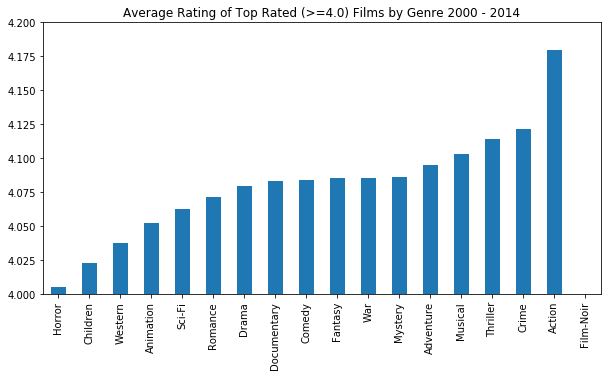

In [201]:
avg_top2000s = {genre : top2000s[top2000s[genre]]['rating'].mean() for genre in genres}
avg_top2000s = pd.Series(avg_top2000s)
ax = avg_top2000s.sort_values().plot(kind='bar', figsize=(10,5), title = "Average Rating of Top Rated (>=4.0) Films by Genre 2000 - 2014")
ax.set_ylim(4.0,4.2)

In [202]:
avg_top2000s.sort_values(ascending=False)

Action         4.179547
Crime          4.121568
Thriller       4.114290
Musical        4.102807
Adventure      4.094733
Mystery        4.085835
War            4.085671
Fantasy        4.085495
Comedy         4.084036
Documentary    4.083096
Drama          4.079552
Romance        4.071072
Sci-Fi         4.062499
Animation      4.052443
Western        4.037893
Children       4.022647
Horror         4.005263
Film-Noir           NaN
dtype: float64

In [203]:
top2000s[genres].sum().sort_values(ascending=False)

Drama          60
Documentary    38
Comedy         26
Thriller       16
Adventure      16
Romance        16
Crime          12
Fantasy        11
Action         11
Sci-Fi         11
War            10
Mystery        10
Animation       7
Musical         4
Children        4
Horror          2
Western         1
Film-Noir       0
dtype: int64

In [204]:
dfc = {'Genre':genres, '90s Mean Rating':genres_rating_list, '2000s Mean Rating':genres_rating_list2}

In [205]:
comparison = pd.DataFrame(dfc)

In [206]:
comparison

,Genre,90s Mean Rating,2000s Mean Rating
0,Action,2.953227,3.072349
1,Adventure,3.033521,3.125399
2,Animation,3.236963,3.246555
3,Children,2.828015,2.972014
4,Comedy,3.033601,3.108409
5,Crime,3.195565,3.208344
6,Documentary,3.401072,3.466128
7,Drama,3.273500,3.290303
8,Fantasy,3.050661,3.158915
9,Film-Noir,3.314351,3.306858


In [207]:
comparison['Difference'] = comparison['2000s Mean Rating'] - comparison['90s Mean Rating']

In [208]:
comparison

,Genre,90s Mean Rating,2000s Mean Rating,Difference
0,Action,2.953227,3.072349,0.119122
1,Adventure,3.033521,3.125399,0.091878
2,Animation,3.236963,3.246555,0.009592
3,Children,2.828015,2.972014,0.143999
4,Comedy,3.033601,3.108409,0.074808
5,Crime,3.195565,3.208344,0.012779
6,Documentary,3.401072,3.466128,0.065056
7,Drama,3.273500,3.290303,0.016803
8,Fantasy,3.050661,3.158915,0.108254
9,Film-Noir,3.314351,3.306858,-0.007493


In [209]:
comparison.set_index('Genre', inplace=True)

In [210]:
comparison['Difference'].sort_values(ascending=False)

Genre
Sci-Fi         0.163170
Children       0.143999
Action         0.119122
Fantasy        0.108254
Horror         0.093935
Adventure      0.091878
Comedy         0.074808
Documentary    0.065056
War            0.019114
Drama          0.016803
Crime          0.012779
Animation      0.009592
Romance        0.003914
Musical        0.000825
Film-Noir     -0.007493
Thriller      -0.010065
Western       -0.041325
Mystery       -0.138849
Name: Difference, dtype: float64

In [211]:
comparison['Difference'].sum()

0.7255164563414915

In [212]:
comparison

,90s Mean Rating,2000s Mean Rating,Difference
Genre,,,
Action,2.953227,3.072349,0.119122
Adventure,3.033521,3.125399,0.091878
Animation,3.236963,3.246555,0.009592
Children,2.828015,2.972014,0.143999
Comedy,3.033601,3.108409,0.074808
Crime,3.195565,3.208344,0.012779
Documentary,3.401072,3.466128,0.065056
Drama,3.273500,3.290303,0.016803
Fantasy,3.050661,3.158915,0.108254


In [213]:
comparison['Percentage Change'] = round(comparison['Difference'] / comparison['90s Mean Rating'] * 100, 2)

In [214]:
comparison

,90s Mean Rating,2000s Mean Rating,Difference,Percentage Change
Genre,,,,
Action,2.953227,3.072349,0.119122,4.03
Adventure,3.033521,3.125399,0.091878,3.03
Animation,3.236963,3.246555,0.009592,0.30
Children,2.828015,2.972014,0.143999,5.09
Comedy,3.033601,3.108409,0.074808,2.47
Crime,3.195565,3.208344,0.012779,0.40
Documentary,3.401072,3.466128,0.065056,1.91
Drama,3.273500,3.290303,0.016803,0.51
Fantasy,3.050661,3.158915,0.108254,3.55


In [215]:
comparison['Percentage Change'].sort_values(ascending=False)

Genre
Sci-Fi         5.59
Children       5.09
Action         4.03
Fantasy        3.55
Horror         3.46
Adventure      3.03
Comedy         2.47
Documentary    1.91
War            0.57
Drama          0.51
Crime          0.40
Animation      0.30
Romance        0.12
Musical        0.03
Film-Noir     -0.23
Thriller      -0.33
Western       -1.30
Mystery       -4.24
Name: Percentage Change, dtype: float64

**90s Films Mean Raw Rating (equal weighted by film)**

In [216]:
movies_90s['rating'].mean()

3.114858534754956

**2000s Films Mean Raw Rating (equal weighted by film)**

In [217]:
movies_2000s['rating'].mean()

3.1872314712443846

In [218]:
difference = movies_2000s['rating'].mean() - movies_90s['rating'].mean()
difference

0.07237293648942833

In [219]:
percent_change = round(difference / movies_90s['rating'].mean() * 100, 2)
print('Percent Change = '+ str(percent_change) +' Percent')

Percent Change = 2.32 Percent


**90s Mean Ratings (equal weighted by genre)**

In [220]:
nineties_mean = round(avg_ratings90s.mean(), 6)
nineties_mean

3.12544

**2000s Mean Ratings (equal weighted by genre)**

In [221]:
overall_mean

3.165746

In [222]:
difference2 = overall_mean - nineties_mean
difference2

0.04030599999999973

In [223]:
percent_change2 = round(difference2 / nineties_mean * 100, 2)
print('Percent Change = '+ str(percent_change2) +' Percent')

Percent Change = 1.29 Percent


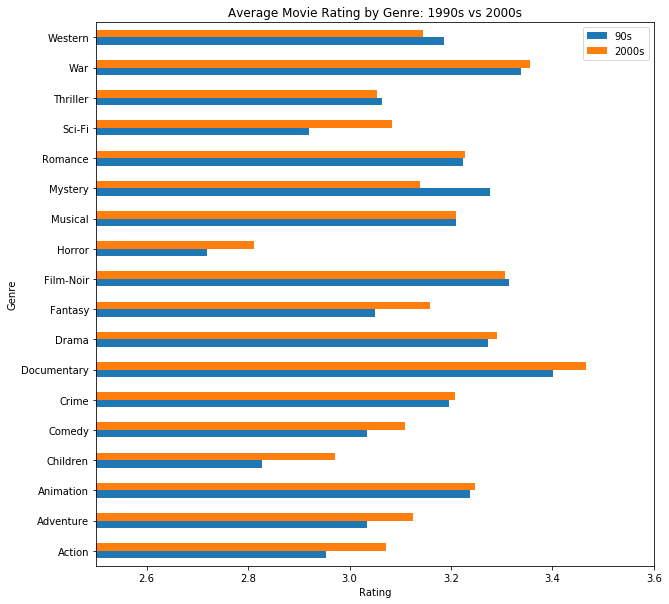

In [225]:
index = genres_list2000s[genres]
dfz = pd.DataFrame({'90s': avg_ratings90s,
                    '2000s': avg_ratings2000s})
ax = dfz.plot.barh(figsize=(10,10))
plt.title('Average Movie Rating by Genre: 1990s vs 2000s')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.xlim(xmin=2.5,xmax=3.6)
plt.savefig(r'AverageRatingbyGenre90s2000s.png')
plt.show()